*Name: Vaidehi Anant Vatsaraj* <br>
*UID: 2018130060*

#### To perform time series analysis: identifying the nature of the phenomenon represented by the sequence of observations, and forecasting

In [17]:
import warnings
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from plotly.offline import iplot
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
from sklearn.metrics import mean_squared_error

In [18]:
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [19]:
ibm = pd.read_csv('./IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
ibm.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [20]:
mcd = pd.read_csv('./MCD_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

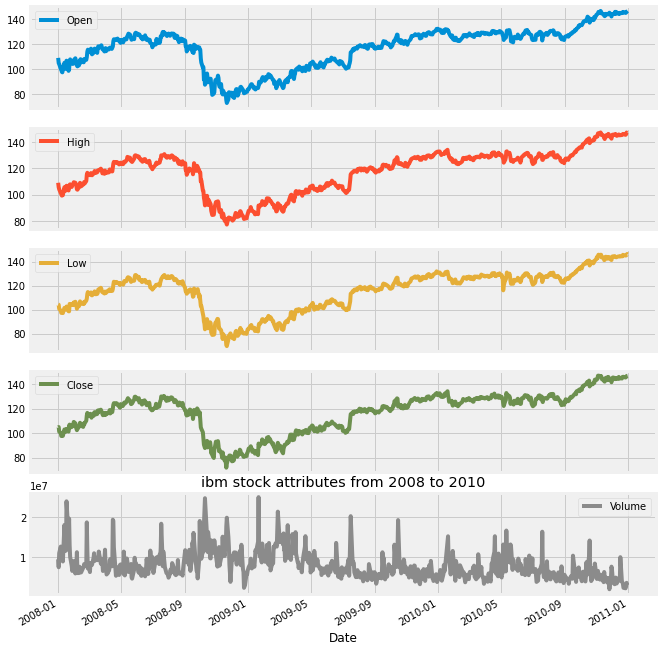

In [21]:
ibm['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('ibm stock attributes from 2008 to 2010')
plt.savefig('stocks.png')
plt.show()

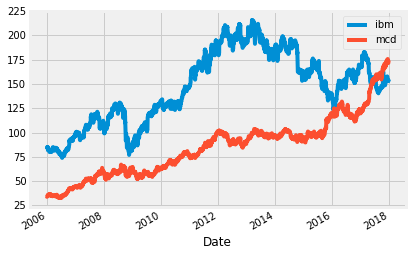

In [22]:
ibm.High.plot()
mcd.High.plot()
plt.legend(['ibm','mcd'])
plt.show()

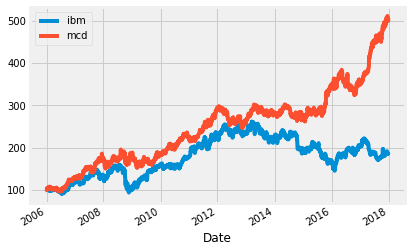

In [23]:
normalized_ibm = ibm.High.div(ibm.High.iloc[0]).mul(100)
normalized_mcd = mcd.High.div(mcd.High.iloc[0]).mul(100)
normalized_ibm.plot()
normalized_mcd.plot()
plt.legend(['ibm','mcd'])
plt.show()

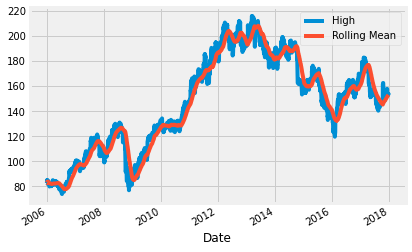

In [24]:
rolling_ibm = ibm.High.rolling('90D').mean()
ibm.High.plot()
rolling_ibm.plot()
plt.legend(['High','Rolling Mean'])
plt.show()

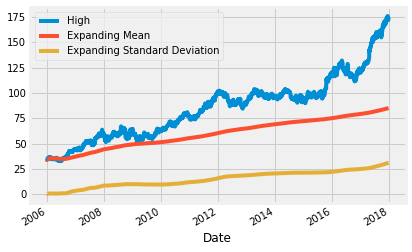

In [25]:
mcd_mean = mcd.High.expanding().mean()
mcd_std = mcd.High.expanding().std()
mcd.High.plot()
mcd_mean.plot()
mcd_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

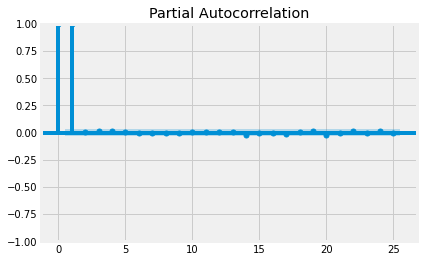

In [26]:
plot_pacf(mcd["Close"],lags=25)
plt.show()

<AxesSubplot:xlabel='Date'>

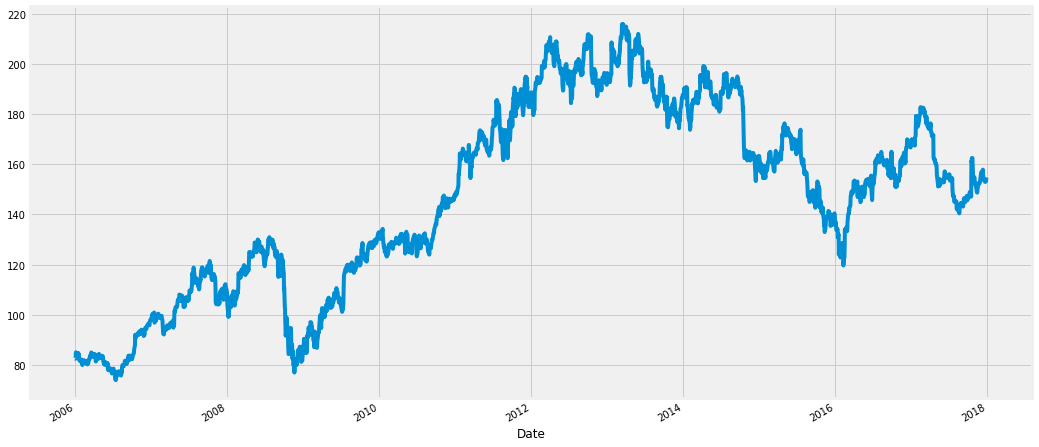

In [27]:
ibm["High"].plot(figsize=(16,8))

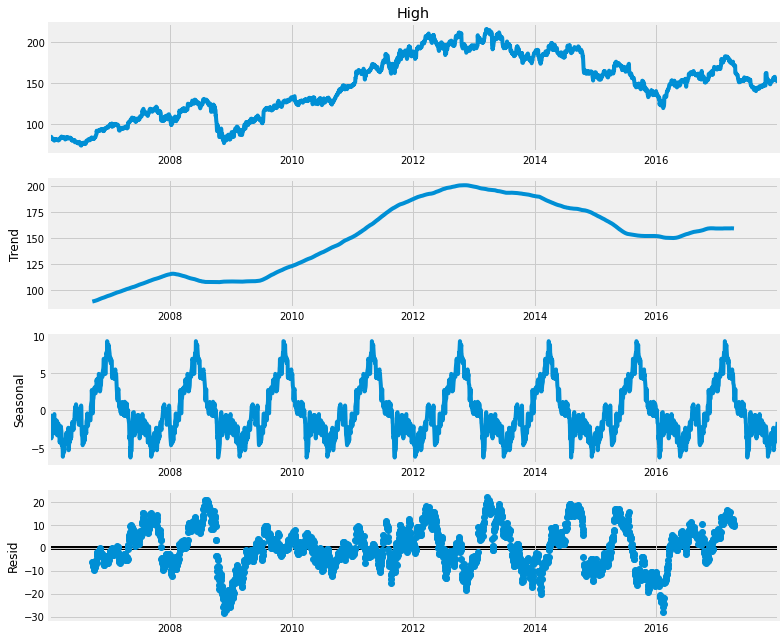

In [29]:
rcParams['figure.figsize'] = 11, 9
decomposed_ibm_volume = sm.tsa.seasonal_decompose(ibm["High"],period=365)
figure = decomposed_ibm_volume.plot()
plt.show()

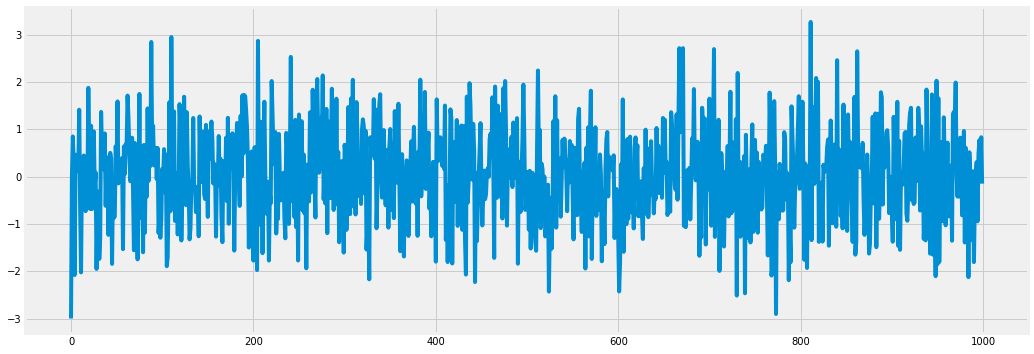

In [30]:
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
plt.plot(white_noise)

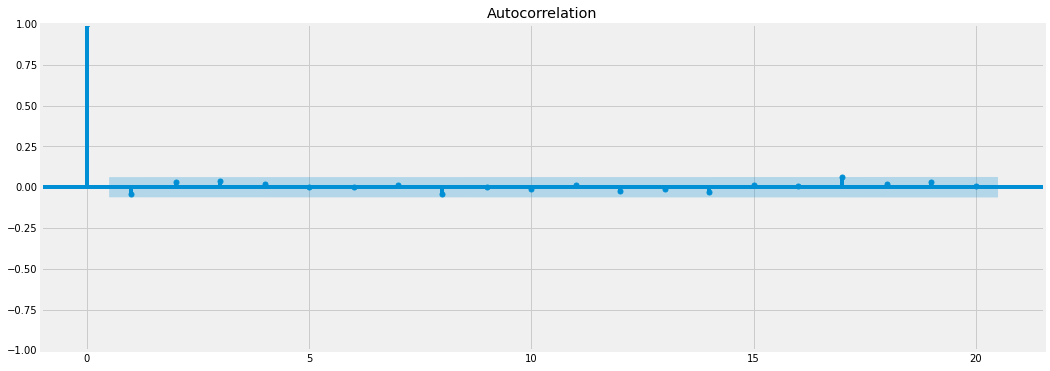

In [31]:
plot_acf(white_noise,lags=20)
plt.show()

In [32]:
adf = adfuller(mcd["Volume"])
print("p-value of mcd: {}".format(float(adf[1])))
adf = adfuller(ibm["Volume"])
print("p-value of ibm: {}".format(float(adf[1])))

p-value of mcd: 1.7439830931948126e-05
p-value of ibm: 0.001886576204201341


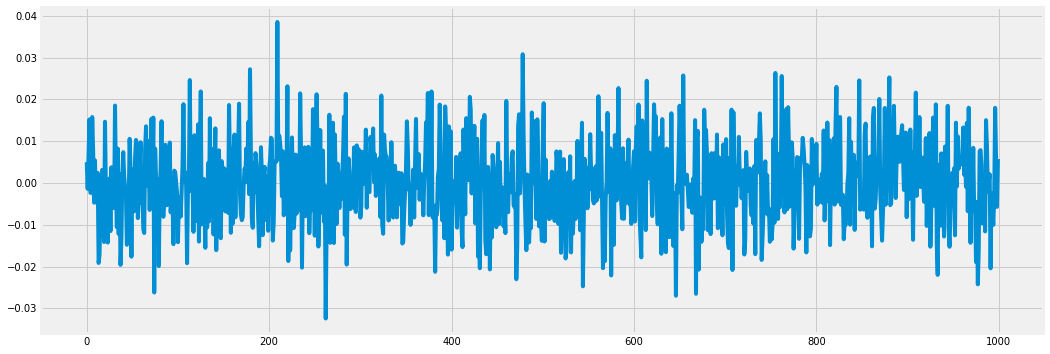

In [33]:
seed(42)
rcParams['figure.figsize'] = 16, 6
random_walk = normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

In [34]:
fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)
iplot(fig, filename='Basic Distplot')

<AxesSubplot:xlabel='Date'>

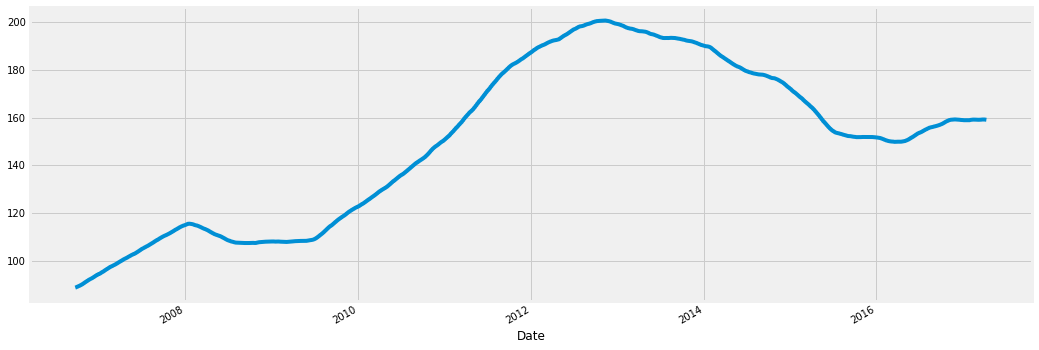

In [35]:
decomposed_ibm_volume.trend.plot()

<AxesSubplot:xlabel='Date'>

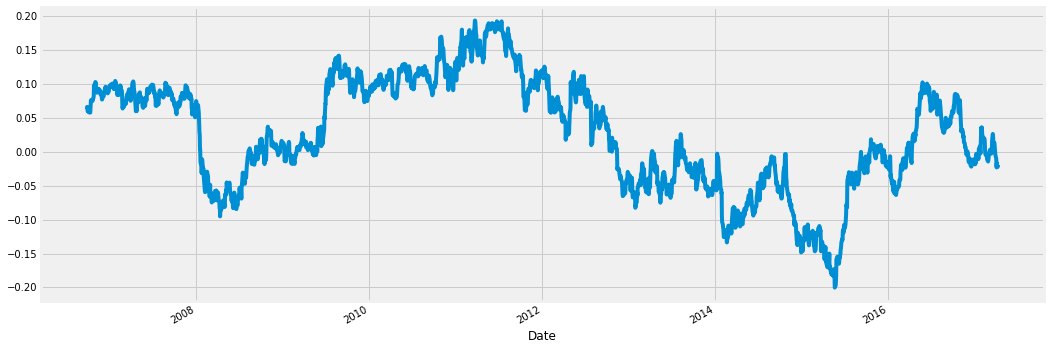

In [36]:
decomposed_ibm_volume.trend.diff().plot()

                           Statespace Model Results                           
Dep. Variable:     ['Close', 'Close']   No. Observations:                 3019
Model:                     VARMA(2,1)   Log Likelihood               -9946.872
                          + intercept   AIC                          19927.743
Date:                Tue, 19 Apr 2022   BIC                          20029.959
Time:                        12:35:32   HQIC                         19964.498
Sample:                             0                                         
                               - 3019                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.00, 0.00   Jarque-Bera (JB):    6418.28, 11083.49
Prob(Q):                        0.99, 0.98   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.34, 2.14   Skew:                      -0.55, 0.38
Prob(H) (two-sided):            0.00,

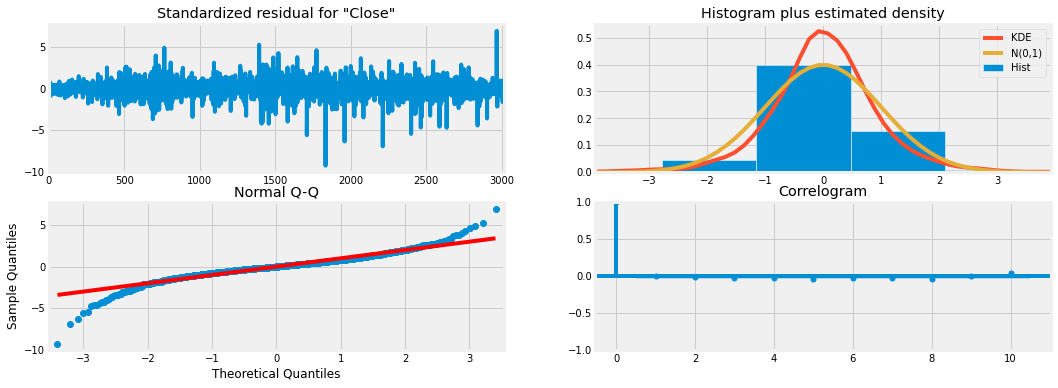

In [37]:
train_sample = pd.concat([ibm["Close"].diff().iloc[1:],mcd["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

#### **Conclusion**

In this experiment, I learnt how time series forecasting is useful in prediction of future values. Time series can be applied in both univariate and multivariate formats. There are many statistical models for time series forecasting eg. VARMAX model or ARIMA model. Ad fuller test done on the dataset is very crucial as it gives the idea about stationarity of the dataset. Models applied have a different way of representing the results. Here, I was able to achieve good results because the data was stationary and the time series data provided by ibm stocks was accurate and patterns. 